## Estimates of Location

This sections is about the mean and median

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
state = pd.read_csv("state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
print(state['Population'].mean())
print(state['Population'].median())

6162876.3
4436369.5


In [3]:
from scipy.stats import trim_mean
print(trim_mean(state['Population'],0.1))

4783697.125


In [4]:
import numpy as np

In [5]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

## Estimates of Variability

It is about dispersion, how tighly clustered or spread out is the data

In [6]:
print("std deviation = " + str(state['Population'].std()))
print("Q3-Q1 = " + str(state['Population'].quantile(0.75)-state['Population'].quantile(0.25)))

std deviation = 6848235.347401142
Q3-Q1 = 4847308.0


In [7]:
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))
print(state["Murder.Rate"].mean())

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
4.066


## Exploratory Data Analysis

Use of graphs to get an idea of the data distribution

Text(0, 0.5, 'Population (Millions)')

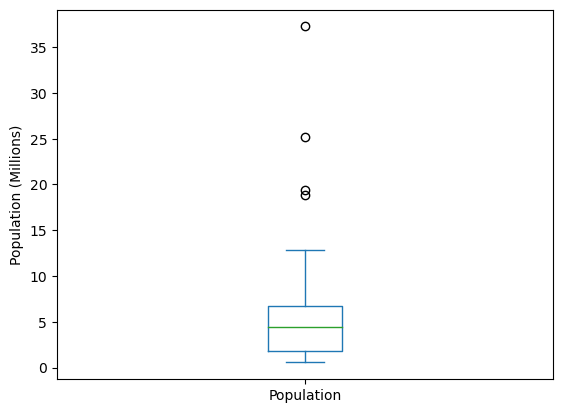

In [8]:
# a boxplot to see population distribution

box = (state["Population"]/1_000_000).plot.box()
box.set_ylabel("Population (Millions)")

In [9]:
# frequency tables histograms, but first segment the population using cut in 10 bins

binned_population = pd.cut(state["Population"],10)
binned_population.value_counts() # this show the amount of population in each bin

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0, 0.5, 'Population (Millions)')

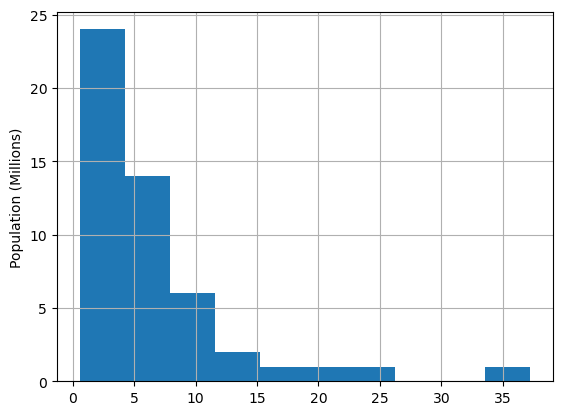

In [10]:
hist_data = (state["Population"]/1_000_000).hist(bins=10) # draws a histogram with 10 bins, with the values obtained from the population
hist_data.set_ylabel("Population (Millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

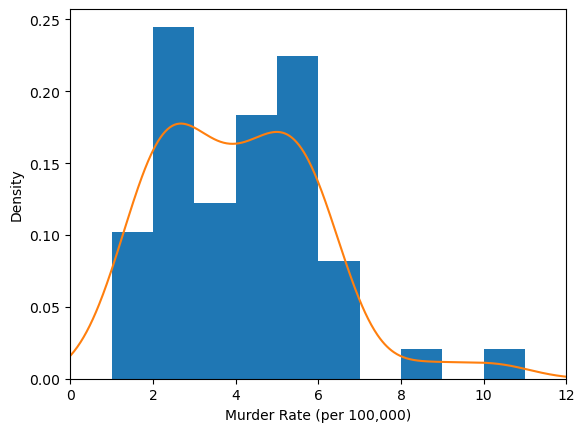

In [11]:
# creating a density plot

ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")

## Exploring Binary and Categorial Data

We use mode, expected value, bar charts and pie charts

In [12]:
dfw_data = pd.read_csv("dfw_airline.csv")
dfw_data.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [13]:
dfw_data.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


Text(0, 0.5, 'Count')

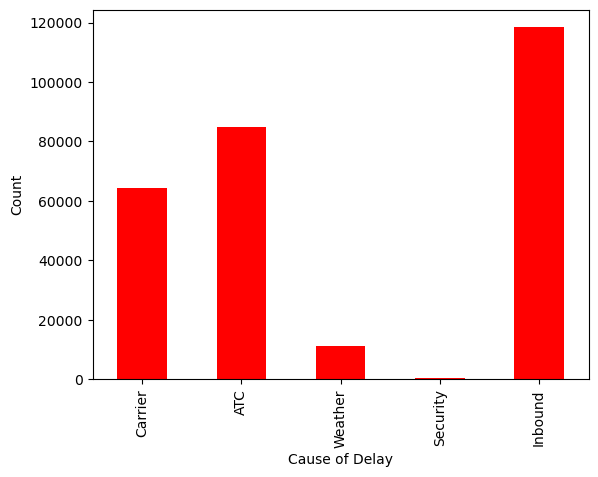

In [14]:
ax = dfw_data.transpose().plot.bar(
    legend=False,
    color="red"
)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

## Correlation

Ffrom -1 to 1, it can be represented as a number, a scatterplot or a correlation matrix like the following

In [15]:
sp500 = pd.read_csv("sp500_data.csv.gz", compression="gzip",index_col="Unnamed: 0")
sp500_sectors = pd.read_csv("sp500_sectors.csv")
sp500_sectors.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [16]:
sp500


,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


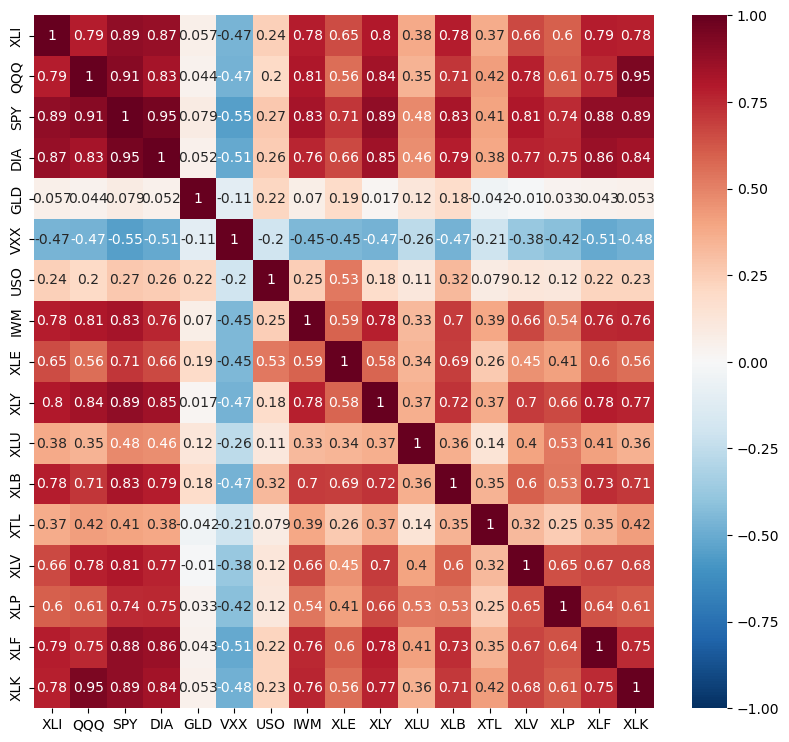

In [17]:
sp500_heatmap = sp500.loc[sp500.index>'2012-07-01',
                          sp500_sectors[sp500_sectors['sector']=='etf']['symbol']]

plt.figure(figsize=(10,9))
sns.heatmap(sp500_heatmap.corr(),vmin=-1,vmax=1,cmap='RdBu_r', annot=True)
plt.show()

## Exploring two or more variables

This can be achieved using hexagonal binning in the scatterplot, contingency tables, contour plots or violin plots

In [18]:
kc_tax = pd.read_csv("kc_tax.csv.gz",compression="gzip")
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [19]:
# first, we filter the data
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000)&
                      (kc_tax.SqFtTotLiving > 100) & 
                      (kc_tax.SqFtTotLiving < 3500),:]

kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

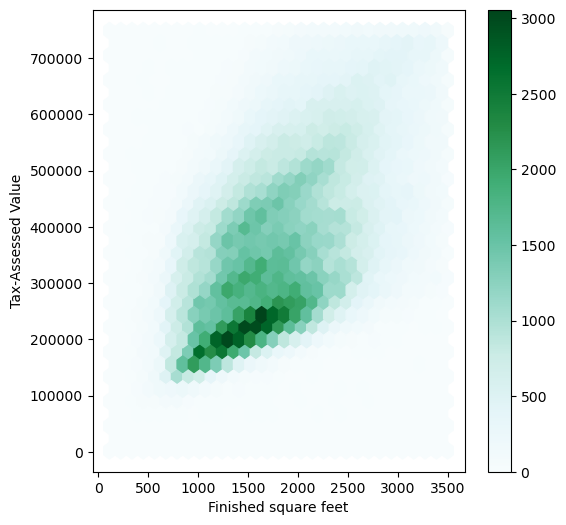

In [20]:
# drawing the hexagonal binning plot

hex_plot = kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(6,6))
hex_plot.set_xlabel("Finished square feet")
hex_plot.set_ylabel("Tax-Assessed Value")

### Multiple boxplot in the same graphic

A good way to analyze multiple categories that have some numeric data is to create a boxplot with a box for each category

In [21]:
airlines_data = pd.read_csv("airline_stats.csv")
airlines_data.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0, 0.5, 'Daily % of Delayed Flights')

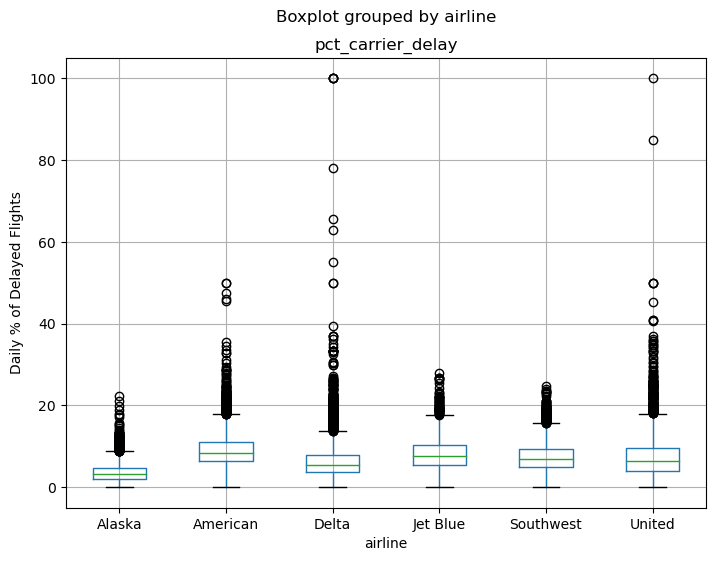

In [23]:
multi_box = airlines_data.boxplot(by="airline",column="pct_carrier_delay",figsize=(8,6))
multi_box.set_ylabel("Daily % of Delayed Flights")

#### Another way to represent categorial and numeric data is a violin plot

They work to represent the density and allows to see details that might get lost in a normal boxplot. But a boxplot shows the outliers more straightforward.

Text(0, 0.5, 'Daily % of Delayed Flights')

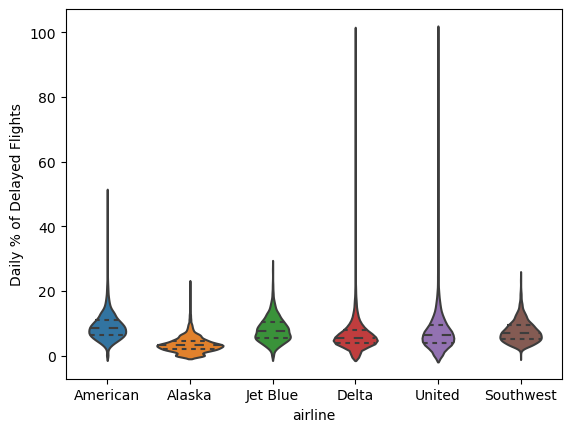

In [25]:
violin_plot = sns.violinplot(data=airlines_data,x='airline', y='pct_carrier_delay', inner='quartile')
violin_plot.set_ylabel("Daily % of Delayed Flights")